<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2023-24

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 11th JANUARY @ 14:00**. 

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [1]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'uwetech-dataset03'

### Function for loading data - do not change

In [2]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

C:\Users\HP\AppData\Local\Temp\ipykernel_1440\3678823198.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_1440\3678823198.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_1440\3678823198.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates

### The following code samples may be useful to aid your investigation

In [152]:
# This shows the employee_data DataFrame
login_data

,datetime,user,action,pc
0,2022-01-01 00:00:30,usr-xzo,login,pc134
1,2022-01-01 00:05:56,usr-gnh,login,pc26
2,2022-01-01 00:11:09,usr-lxm,login,pc0
3,2022-01-01 00:14:09,usr-esy,login,pc246
4,2022-01-01 00:21:27,usr-wpq,login,pc210
...,...,...,...,...
151995,2022-10-31 23:49:22,usr-vzl,logoff,pc62
151996,2022-10-31 23:50:59,usr-rtz,logoff,pc222
151997,2022-10-31 23:52:20,usr-fqc,logoff,pc201
151998,2022-10-31 23:52:49,usr-sgs,logoff,pc230


In [10]:
# This shows the login_data DataFrame
email_data

,datetime,sender,recipient
0,2022-01-01 00:21:57.493348,usr-gnh@uwetech.com,usr-ivm@uwetech.com
1,2022-01-01 00:24:55.477151,usr-wpq@uwetech.com,usr-btq@uwetech.com
2,2022-01-01 00:24:56.196984,usr-gnh@uwetech.com,usr-dek@uwetech.com
3,2022-01-01 00:25:26.366137,usr-wpq@uwetech.com,usr-ykf@uwetech.com
4,2022-01-01 00:26:02.835872,usr-wpq@uwetech.com,usr-obn@uwetech.com
...,...,...,...
4033579,2022-10-31 23:46:59.513537,usr-rtz@uwetech.com,usr-rtz@uwetech.com
4033580,2022-10-31 23:46:59.669350,usr-sgs@uwetech.com,usr-mzg@uwetech.com
4033581,2022-10-31 23:47:37.499847,usr-fqc@uwetech.com,usr-wlw@uwetech.com
4033582,2022-10-31 23:49:43.573915,usr-rtz@uwetech.com,usr-jql@uwetech.com


In [5]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-gnh']

,datetime,user,action,pc
1,2022-01-01 00:05:56,usr-gnh,login,pc26
455,2022-01-01 21:21:02,usr-gnh,logoff,pc26
621,2022-01-02 06:27:52,usr-gnh,login,pc26
960,2022-01-02 21:28:16,usr-gnh,logoff,pc26
1011,2022-01-03 00:58:13,usr-gnh,login,pc26
...,...,...,...,...
150981,2022-10-29 23:15:40,usr-gnh,logoff,pc26
151059,2022-10-30 03:36:41,usr-gnh,login,pc26
151494,2022-10-30 23:45:07,usr-gnh,logoff,pc26
151526,2022-10-31 01:35:13,usr-gnh,login,pc26


In [6]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-gnh'])]

,datetime,user,action,pc
1,2022-01-01 00:05:56,usr-gnh,login,pc26
455,2022-01-01 21:21:02,usr-gnh,logoff,pc26
621,2022-01-02 06:27:52,usr-gnh,login,pc26
960,2022-01-02 21:28:16,usr-gnh,logoff,pc26
1011,2022-01-03 00:58:13,usr-gnh,login,pc26
...,...,...,...,...
150981,2022-10-29 23:15:40,usr-gnh,logoff,pc26
151059,2022-10-30 03:36:41,usr-gnh,login,pc26
151494,2022-10-30 23:45:07,usr-gnh,logoff,pc26
151526,2022-10-31 01:35:13,usr-gnh,login,pc26


In [7]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Security', 'Finance', 'HR', 'Legal', 'Director', 'Technical',
       'Services'], dtype=object)

In [3]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [45]:
# List all usernames that belong to the job role Finance
user_set['Director']

['usr-vwm',
 'usr-auy',
 'usr-ysr',
 'usr-dbr',
 'usr-mmn',
 'usr-obb',
 'usr-aki',
 'usr-snj',
 'usr-aug',
 'usr-xgi',
 'usr-pkk',
 'usr-qkl',
 'usr-vzl',
 'usr-obn',
 'usr-qzj',
 'usr-rjw',
 'usr-jzu',
 'usr-czw',
 'usr-ujm',
 'usr-xzo',
 'usr-lhr',
 'usr-lhy',
 'usr-ocp',
 'usr-lzg',
 'usr-nte',
 'usr-qzs',
 'usr-lvl',
 'usr-jhq',
 'usr-skl',
 'usr-vfs',
 'usr-wcy',
 'usr-wpq',
 'usr-twk',
 'usr-xbb',
 'usr-sqx']

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

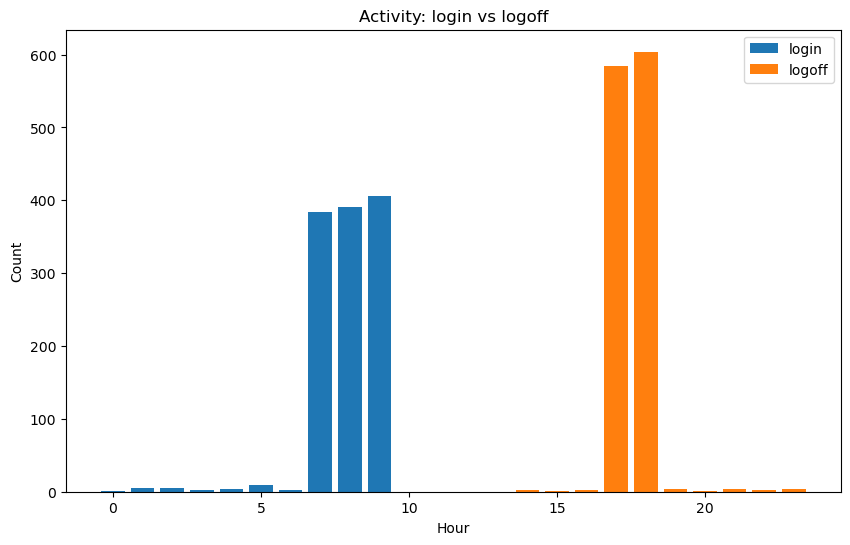

In [72]:
######### ADD YOUR CODE HERE ##########
#copying the login dataframe and separate datetime into month and hour columns 
df=login_data.copy()
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M:%S')
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['datetime'] = df['datetime'].dt.strftime('%d-%m-%Y %H')
# filtering the data by month for users part of the Finance dep

df = df[(df['month'] == 1) & (df['user'].isin(user_set['Finance']))]

# group by hour and action (login or logoff)

grouped = df.groupby(['hour', 'action']).size().reset_index(name='count')
#separating the two actions into df_on and df_off 
df_on = grouped[grouped['action'] == 'login']
df_off = grouped[grouped['action'] == 'logoff']

# Create bar chart for 'on' and 'off' activities on the same graph
plt.figure(figsize=(10, 6))
plt.bar(df_on['hour'], df_on['count'], label='login')
plt.bar(df_off['hour'], df_off['count'], label='logoff')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Activity: login vs logoff')
plt.legend()
plt.show()

The most common login time for this role being 9am and logoff time being 6pm 

### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



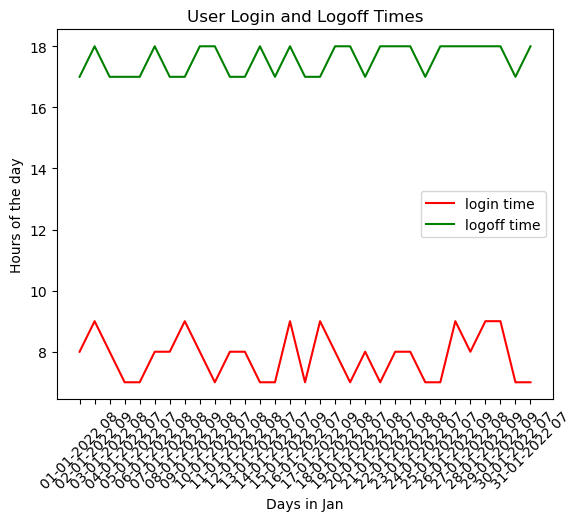

In [76]:
######### ADD YOUR CODE HERE ##########
#copying the previous df dataframe then filter by usr-mkm for Jan 
pc42df=df.copy()
pc42df = pc42df[(pc42df['month'] == 1) & (pc42df['user']=='usr-mkm')]
pc42df
# selecting the rows depending on the action 
login = pc42df[pc42df['action'] == 'login']
logoff = pc42df[pc42df['action'] == 'logoff']
X1=login['datetime']
x2=logoff['datetime']
y1=login['hour']
y2=logoff['hour']
plt.plot( X1,y1, color='r', label='login time') 
plt.plot(X1,y2, color='g', label='logoff time') 

plt.xticks(rotation=45)
plt.legend()
plt.title('User Login and Logoff Times')
plt.xlabel('Days in Jan')
plt.ylabel('Hours of the day')

plt.show()

### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2022. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

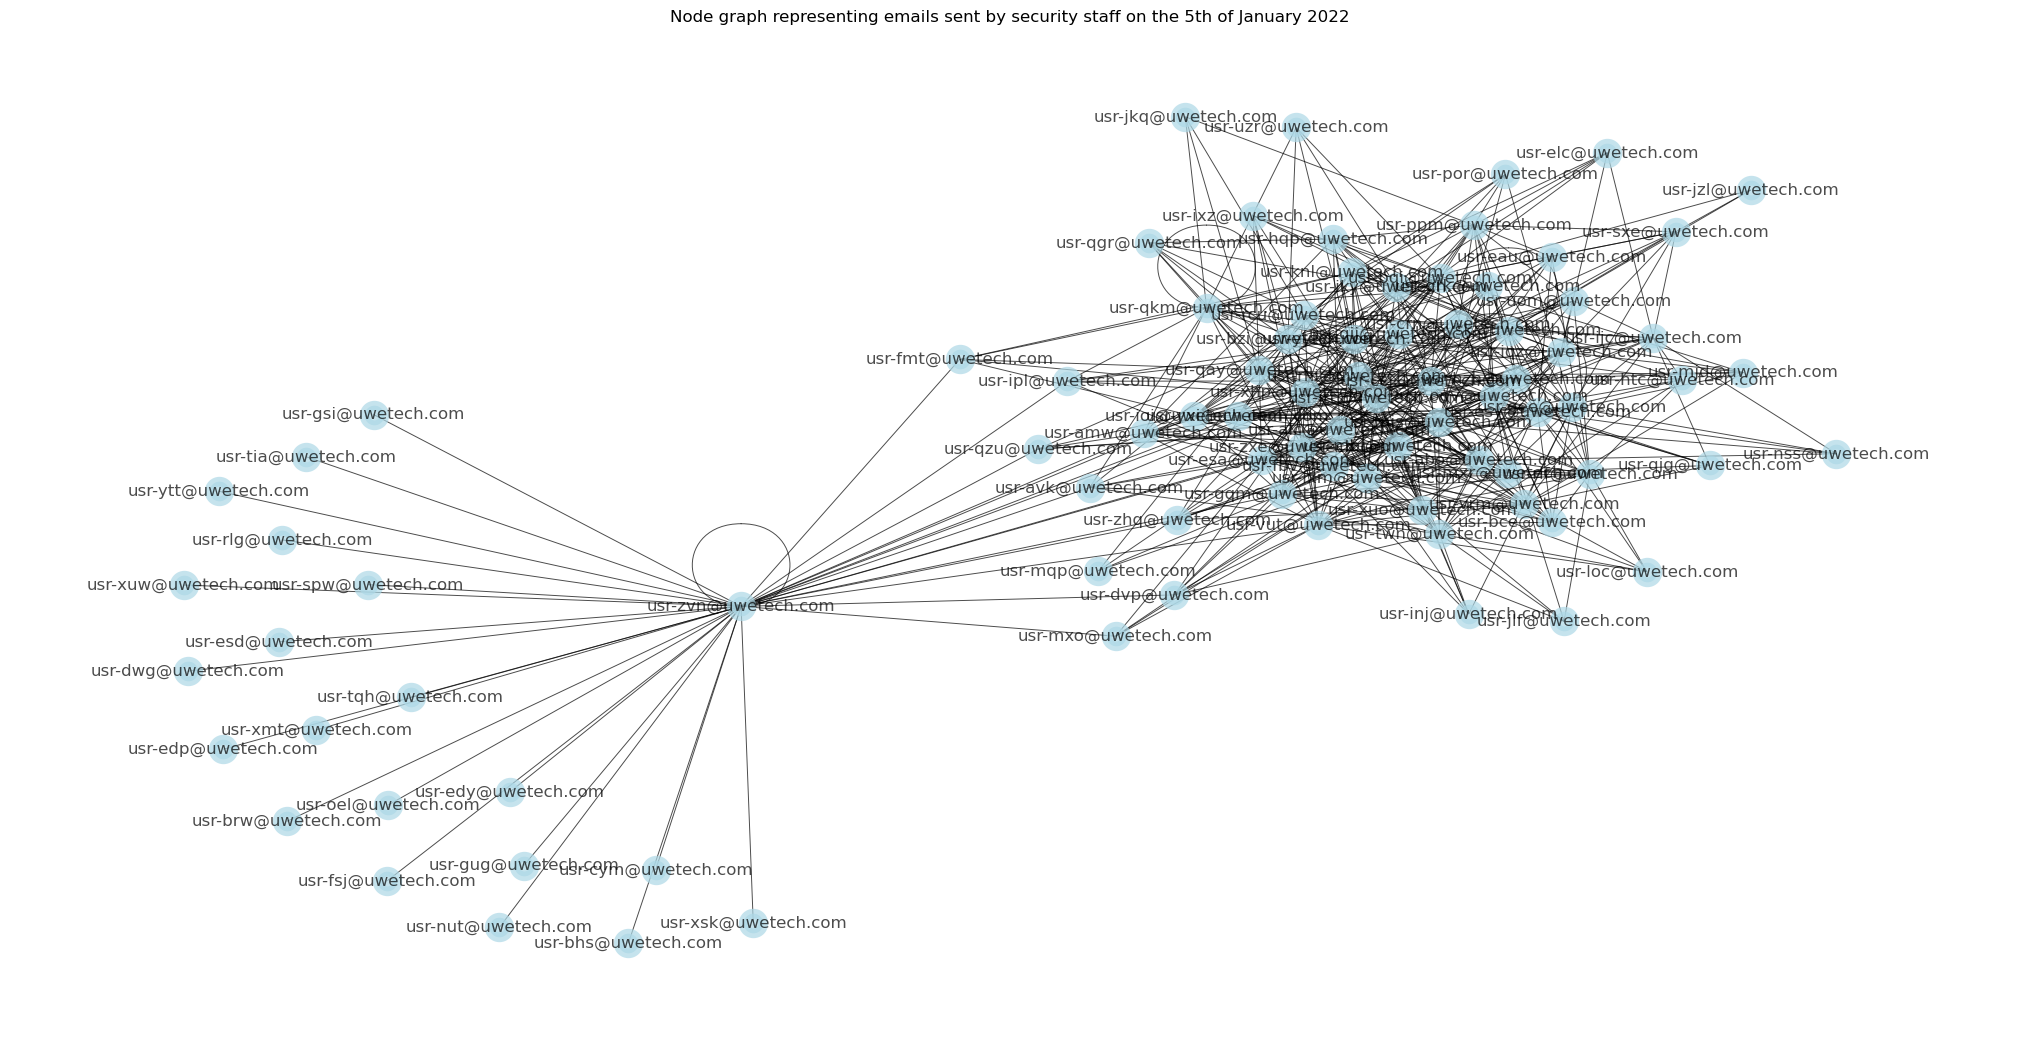

In [79]:
######### ADD YOUR CODE HERE ##########
import networkx as nx
email_data
#first I will need to filter datetime to only the 5th of Jan 
Q3df=email_data.copy()

# filtering the data for the 5th of Jan when the sender is part of the Security dep 
Newq3 = Q3df[(Q3df['datetime'].dt.year == 2022) & (Q3df['datetime'].dt.month == 1) & (Q3df['datetime'].dt.day == 5) & (Q3df['sender'].isin(user_set_emails['Security']))]
Newq3

# using the method nx.from_pandas to create the node graph from my dataframe 
plt.figure(figsize=(20,10))
G = nx.from_pandas_edgelist(Newq3, source='sender', target='recipient', edge_attr=None)
# using a spring layout to represent the node graph 
pos = nx.spring_layout(G,k=40)
# some tweaking is needed to visualize the data different node sizes qnd alphas as well as linewidths had to be changed 
# Draw the nodes and edges
nx.draw(G,with_labels=True,node_size=200,node_color="lightblue",alpha=0.7,linewidths=7,width=0.7)
plt.title('Node graph representing emails sent by security staff on the 5th of January 2022')


# Show the plot
plt.show()




### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

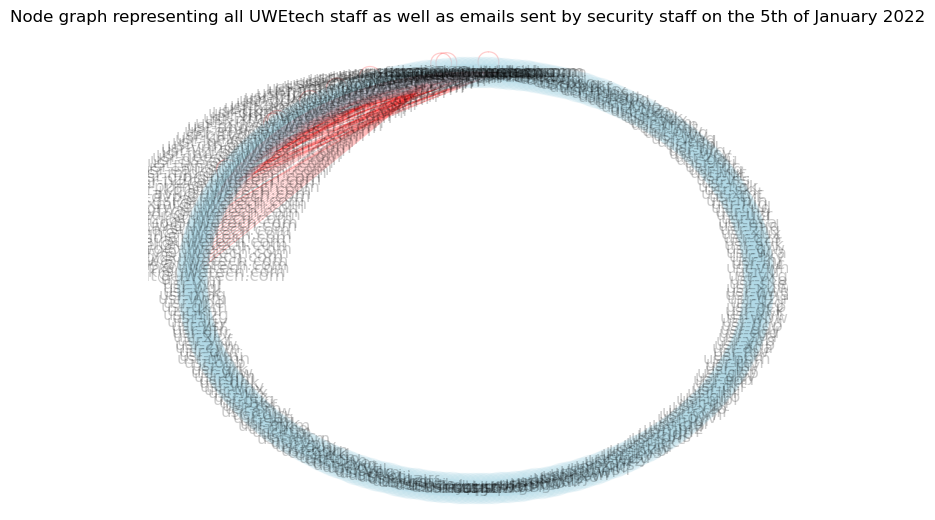

In [7]:
######### ADD YOUR CODE HERE ##########
Q3df=email_data.copy()
#creating my nodes from the list of all users 
users=list(employee_data['user'])
# creating the graph and adding each user as a node 
import networkx as nx
G = nx.Graph()
#Adding all users as nodes 
for u in users:
    G.add_node(u)

#Adding the edges 
Newq3 = Q3df[(Q3df['datetime'].dt.year == 2022) & (Q3df['datetime'].dt.month == 1) & (Q3df['datetime'].dt.day == 5) & (Q3df['sender'].isin(user_set_emails['Security']))]
Newq3

senders=list(Newq3['sender'])
recipients=list(Newq3['recipient'])
#Adding 
for sender, recipient in zip(senders, recipients):
    G.add_edge(sender, recipient)
#G.edges
#Newq3
pos = nx.shell_layout(G)

nx.draw(G,pos, with_labels=True, node_color='lightblue', edge_color='red',alpha=0.2,linewidths=10,width=0.9,node_size=160)
plt.title('Node graph representing all UWEtech staff as well as emails sent by security staff on the 5th of January 2022')
plt.show()

### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

C:\Users\HP\AppData\Local\Temp\ipykernel_1440\1782127210.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newq5['dep'] = np.select(conditions, values)


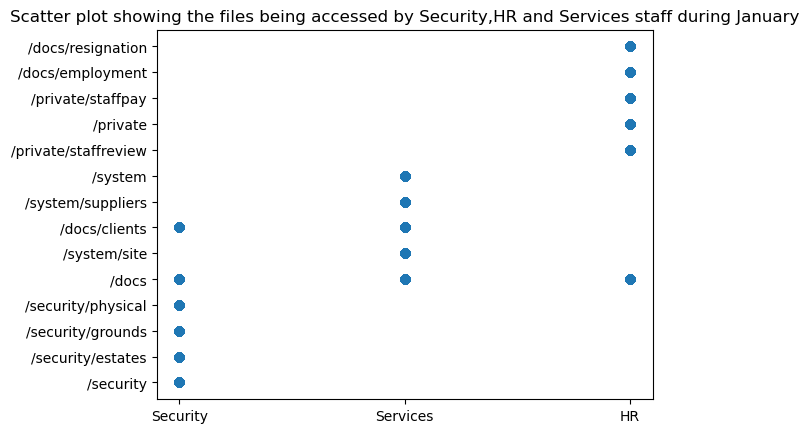

In [8]:
######### ADD YOUR CODE HERE ##########
#Scatter plots are what could be used as a plot 
# first step is filtering the file_data dataset 
# filtering the datetime to have it in January only 
# filtering the users into groups , by checking if they are part of a group Services, HR or Security 
import numpy as np
file_data
q5df=file_data.copy()
Newq5 = q5df[(q5df['datetime'].dt.month == 1) & ((q5df['user'].isin(user_set['Security'])) | (q5df['user'].isin(user_set['HR'])) |(q5df['user'].isin(user_set['Services'])))]
Newq5
#grouping users per group 
conditions = [
    Newq5['user'].isin(user_set['Security']),
    Newq5['user'].isin(user_set['HR']),
    Newq5['user'].isin(user_set['Services'])
]
values = ['Security', 'HR', 'Services']

# Use numpy.select() to assign values based on conditions
Newq5['dep'] = np.select(conditions, values)
plt.scatter(Newq5['dep'],Newq5['filename'])
plt.title('Scatter plot showing the files being accessed by Security,HR and Services staff during January')
plt.show()

### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for: 
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

#  1 Data analysis pipeline :

Before starting the investigation I had to establish a baseline to follow . As the month of January is considered safe, I have used it as baseline to have a standard data pattern for the UWEtech organization . 
The second phase of the pipeline would be to familiarize myself with the data to recognize any activity that does not align with it later on. I will then move on to the investigation phase which will focus on detecting inconsistencies and deviations from the data pattern set, and that by using specific detection methods such as role-based detection (comparing the activity of users from the same department as well as activity-based detection (whether the activity occurred before, how many times has it happen before) and finally attribute-based detection (files,usb activity...)

# 2 Steps followed during the investigation :

    1.
   Following an attribute-based detection I have started with the login_data file. The goal was to observe whether the login/logoff patterns would change throughout the months using January as baseline.
    The bar charts below (Figure 1) represents the login/logoff activity of the users for each month from Jan-Oct , as it can be seen the activity is mostly unchangeable from month 1 to month 10 .
   

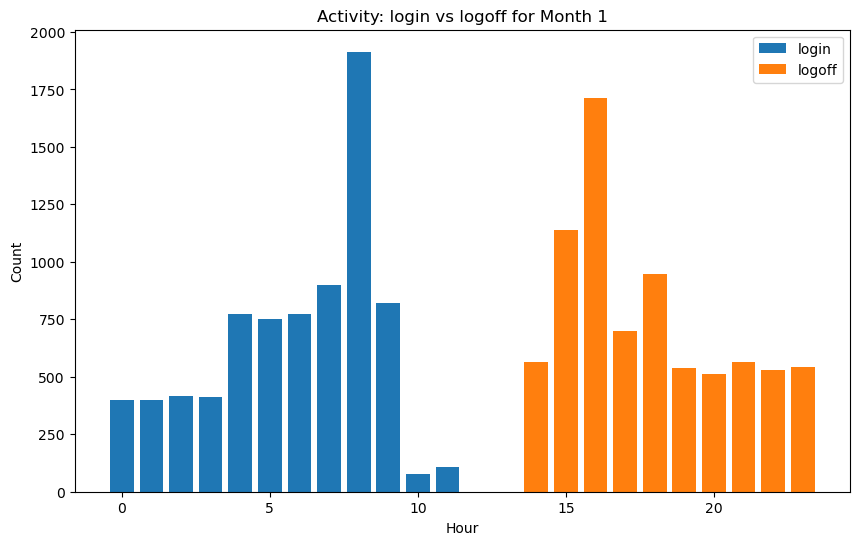

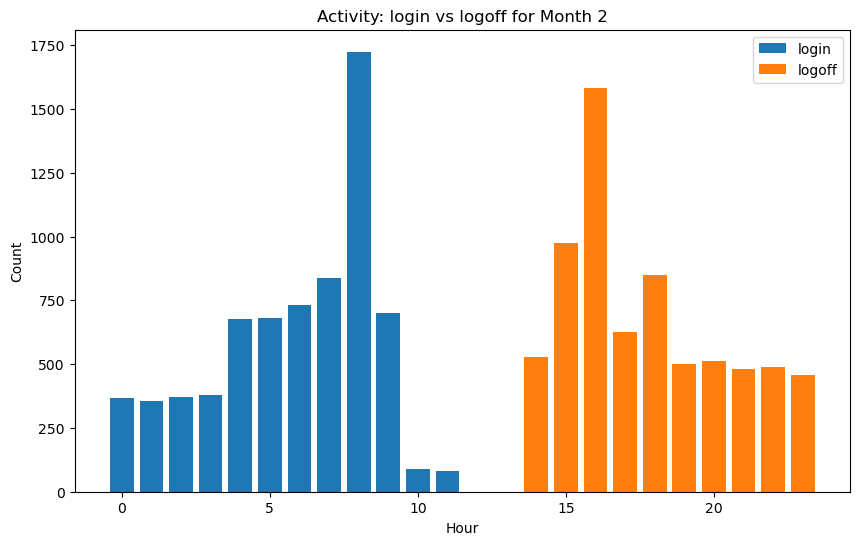

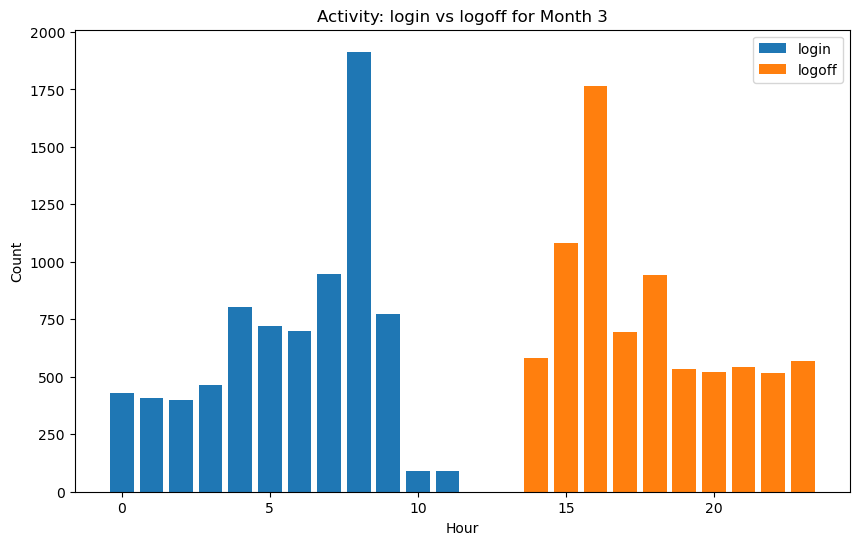

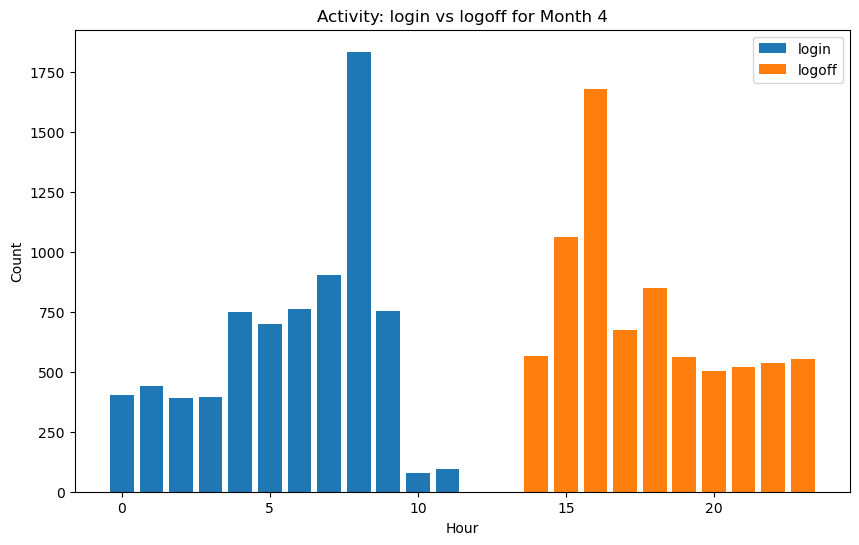

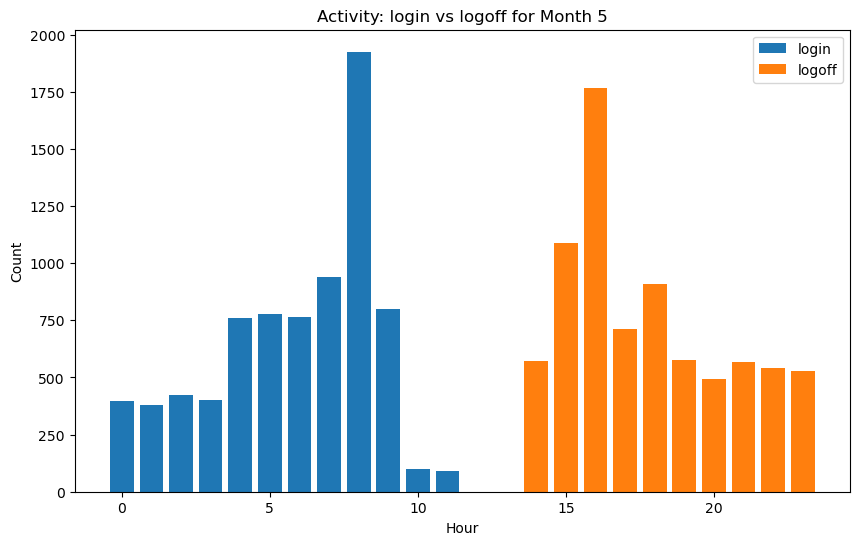

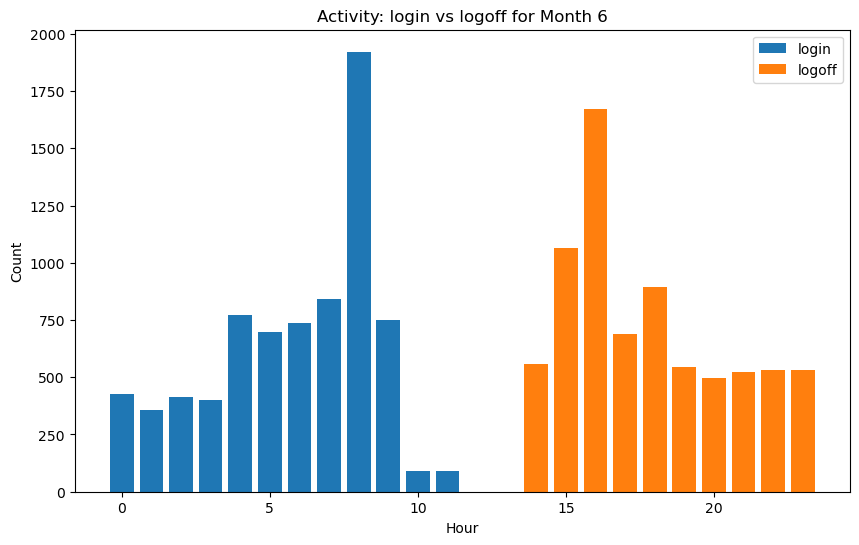

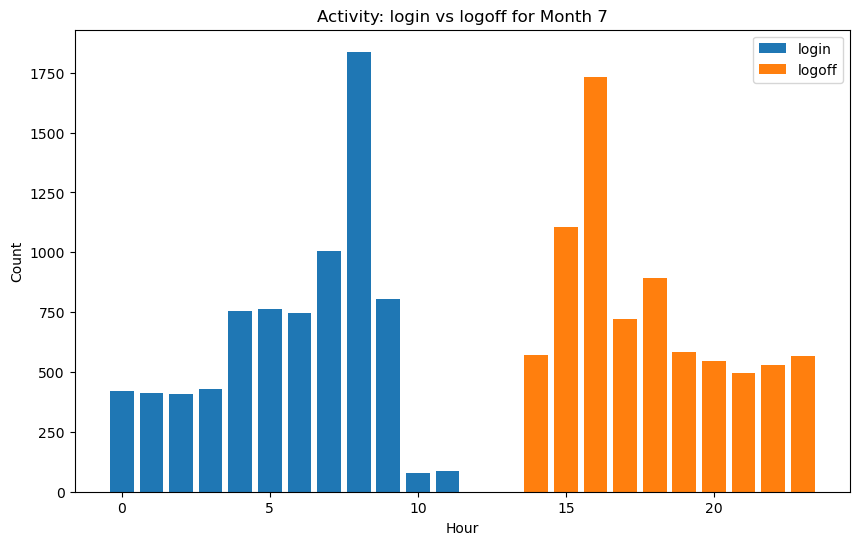

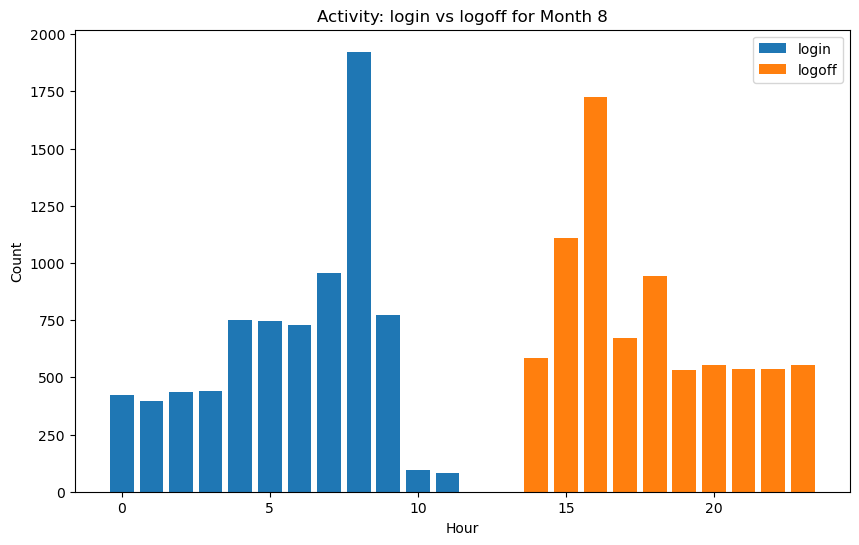

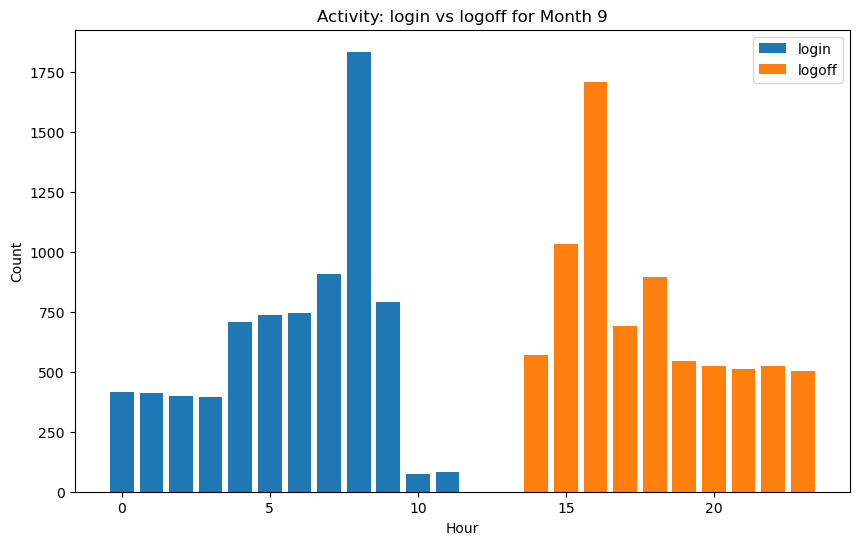

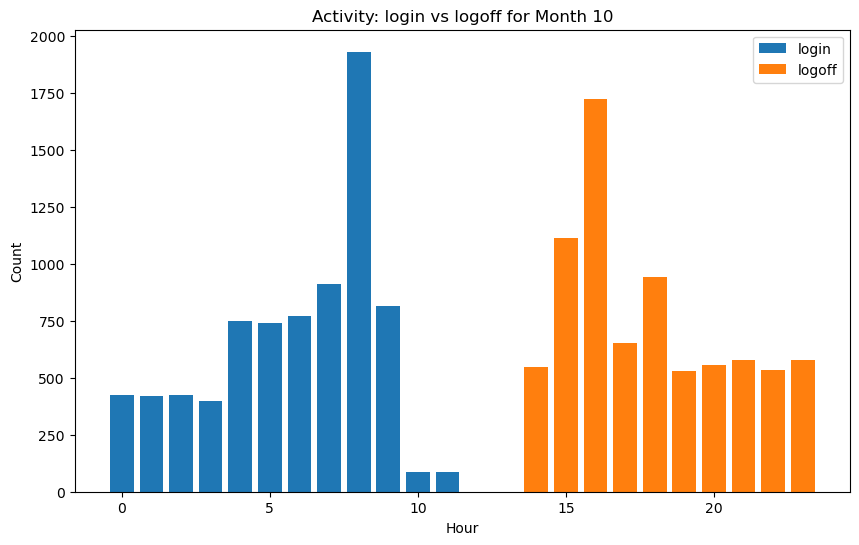

In [134]:
######### ADD YOUR CODE HERE ##########
#checking the login data for the rest of the months to see if anything changed 
df=login_data.copy()
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M:%S')
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['datetime'] = df['datetime'].dt.strftime('%d-%m-%Y %H')
# Extract month from datetime column




grouped = df.groupby(['month','hour', 'action']).size().reset_index(name='count')

df_on = grouped[grouped['action'] == 'login']
df_off = grouped[grouped['action'] == 'logoff']
for month in range(1, 11):
    df_month = grouped[grouped['month'] == month]
    
    df_on_month = df_month[df_month['action'] == 'login']
    df_off_month = df_month[df_month['action'] == 'logoff']
    
    plt.figure(figsize=(10, 6))
    plt.bar(df_on_month['hour'], df_on_month['count'], label='login')
    plt.bar(df_off_month['hour'], df_off_month['count'], label='logoff')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title(f'Activity: login vs logoff for Month {month}')
    plt.legend()
    plt.show()




# Figure 1: Bar charts for login/logoff activities for months(1-10)

 2.
 After not finding anything suspicious in the login_data I moved to the second attribute the file_data. I chose to investigate using a role-based detection to get an overall view of the different files each department has access to . As can be seen in Figure 2, each department has access to its shared files with the exception of some files which multiple departments share . At the current stage of the investigation it is too early to detect a suspicious event based on this attribute. 
 

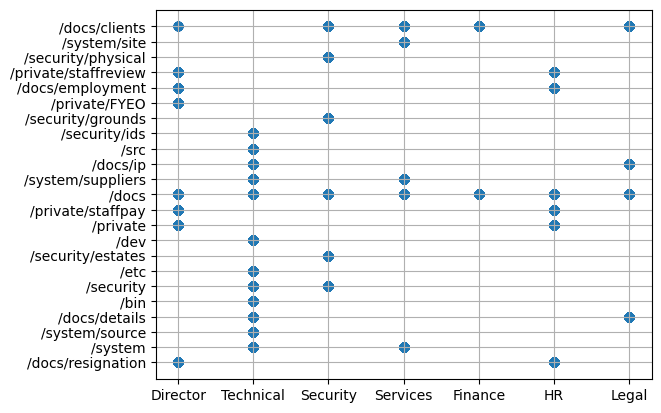

In [25]:
import numpy as np
file_data
test=file_data.copy()
test = test[ ((test['user'].isin(user_set['Security'])) | (test['user'].isin(user_set['HR'])) |(test['user'].isin(user_set['Services']))|(test['user'].isin(user_set['Legal']))|(test['user'].isin(user_set['Technical']))|(test['user'].isin(user_set['Director']))|(test['user'].isin(user_set['Finance'])))]
test
#grouping users per group 
conditions = [
    test['user'].isin(user_set['Security']),
    test['user'].isin(user_set['HR']),
     test['user'].isin(user_set['Legal']),
    test['user'].isin(user_set['Finance']),
    test['user'].isin(user_set['Director']),
    test['user'].isin(user_set['Technical']),
    test['user'].isin(user_set['Services'])
]
values = ['Security', 'HR', 'Legal','Finance','Director','Technical','Services']

test['dep'] = np.select(conditions, values)
plt.scatter(test['dep'],test['filename'])
plt.grid()
plt.show()

# Figure 2 : Scatter chart representing the files accessed by each department

3. 
Just as seen for Figure 2 above the same code was used to investigate the web activity of the different department throughout the months. The web_data dataframe was filtered and as can be seen on Figure 3 . While most of the websites accessed by the users seem to be related to their work, we notice that somebody from the Director department accessed the http://www.lawyers4u.com website which is usually accessed by the Legal team . This potential suspicious event led to further diggings.

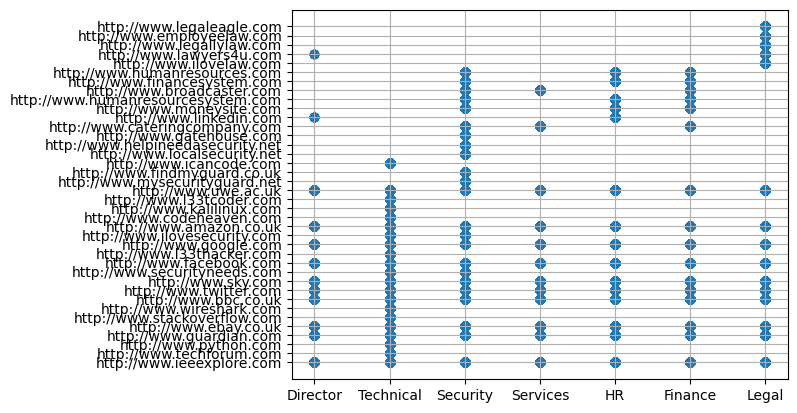

In [36]:
web_data
test=web_data.copy()

test = test[ ((test['user'].isin(user_set['Security'])) | (test['user'].isin(user_set['HR'])) |(test['user'].isin(user_set['Services']))|(test['user'].isin(user_set['Legal']))|(test['user'].isin(user_set['Technical']))|(test['user'].isin(user_set['Director']))|(test['user'].isin(user_set['Finance'])))]
test
#grouping users per group 
conditions = [
    test['user'].isin(user_set['Security']),
    test['user'].isin(user_set['HR']),
     test['user'].isin(user_set['Legal']),
    test['user'].isin(user_set['Finance']),
    test['user'].isin(user_set['Director']),
    test['user'].isin(user_set['Technical']),
    test['user'].isin(user_set['Services'])
]
values = ['Security', 'HR', 'Legal','Finance','Director','Technical','Services']

# Use numpy.select() to assign values based on conditions
test['dep'] = np.select(conditions, values)
plt.scatter(test['dep'],test['website'])
plt.grid()
plt.show()

# Figure 3 :Scatter chart representing the web activity of all departments 

4.  While the next step taken in the investigation is still role-based, the focus was solely on the Director department .

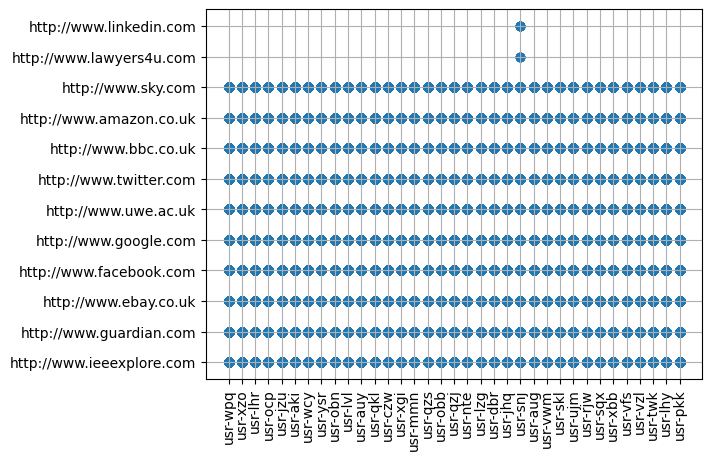

In [141]:
web_data
Director_web=web_data.copy()

Director_web = Director_web[ ((Director_web['user'].isin(user_set['Director'])))]
Director_web
plt.scatter(test['user'],test['website'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Figure 4: Scatter chart representing the web activity of Director staff

As can be seen on Figure 4 above, the investigation of web_file led to the following conclusions :
- The user 'usr-snj' is the only user part of the Director staff to access the lawyers4u as well as linkedin websites 
- The results show an inconsistency, as they dont align with the standard data pattern observed for the Director role
- A further investigation of usr-snj is needed 

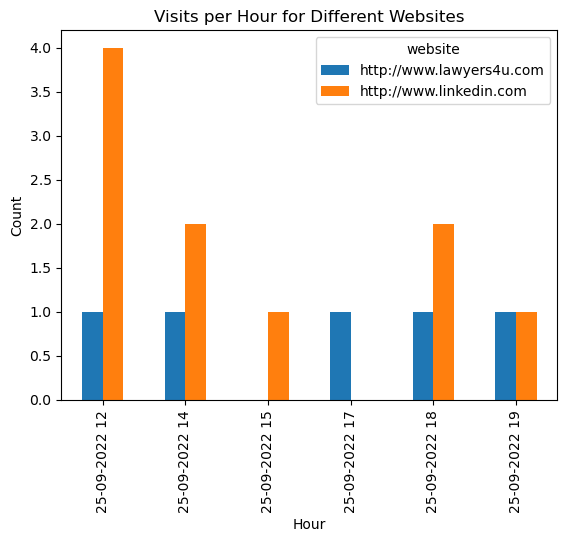

"dff['datetime'] = pd.to_datetime(dff['datetime'])\ndf_count = dff.groupby(['datetime', 'website']).size().unstack(fill_value=0)\n\n# Plot the time series\nplt.figure(figsize=(12, 6))\nfor website in df_count.columns:\n    plt.plot(df_count.index, df_count[website], label=website)\n\nplt.xlabel('Timestamp')\nplt.ylabel('Count')\nplt.title('User Activity on Di3fferent Websites')\nplt.legend()\nplt.show()"

In [159]:

df=web_data.copy()
df
#filtering websites to only check the two suspicious activities
dff = df[(df['website'] == 'http://www.lawyers4u.com')| (df['website']=='http://www.linkedin.com')]

#adding a constraint for only selecting employees from the Director dep 
dff=dff[(dff['user'].isin(user_set['Director']))]
dff

#changing datetime to day and hour 

dff['datetime'] = pd.to_datetime(dff['datetime'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H')

# Group by website and hour, and count the occurrences
website_hour_counts = dff.groupby(['datetime', 'website']).size().unstack(fill_value=0)

# Create a stacked bar chart for both websites
website_hour_counts.plot(kind='bar', stacked=False)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Visits per Hour for Different Websites')
plt.show()



# Figure 5: bar chart showing the number of times usr-snj accessed linkedIn or lawyers4u throughout the months per day/hour 

As seen above , after filtering the dataframe to only those 2 websites , we can see that usr-snj visited the lawyers4u website 5 times on the 25/09/2022 as well as linkedin 10 times on the same day all between 12:05 and 19:27 . The 25th of September being the first and last day this activity was observed during the timeline investigated . 

5. 
Following the two suspicious events found in web_data , I have decided to move on to the next attribute "usb" in order to get an insight of the usb activity . As the previous events where linked to usr-snj I chose to continue investigating the Director department 

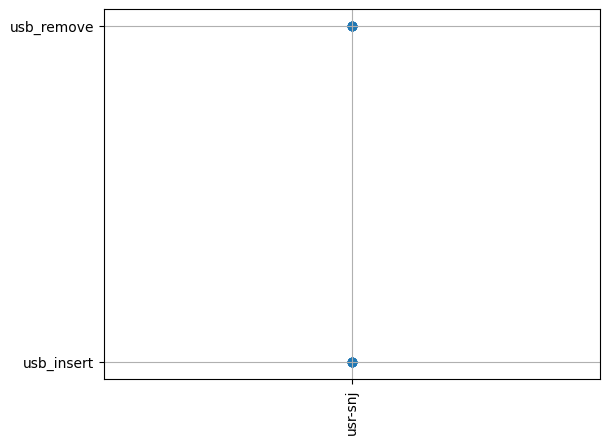

In [163]:
usb=usb_data
usb
# filter dataframe by dep Director
usbb=usb[usb['user'].isin(user_set['Director'])]
usbb
plt.scatter(usbb['user'],usbb['action'])
plt.xticks(rotation=90)
plt.grid()
plt.show()


# Figure 6: Scatter chart showing the usb activity of Director staff's from month (1-10)

#### Figure 6 confirms the suspicions we were having regarding usr-snj , throughout the timeframe we are investigating , it was observed that usb activity obtained was not considered as standard data pattern for Director's staff. Figure 6 shows that usr-snj is yet again the only staff part of Director that has ever had a usb activity .

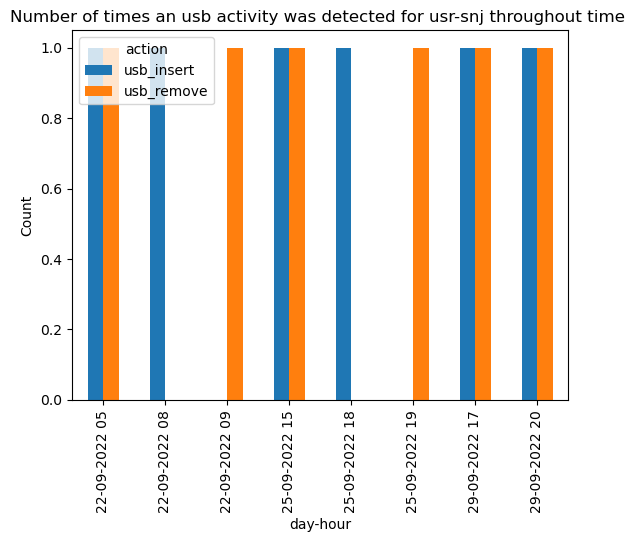

In [164]:
usbbb=usb_data.copy()
usbbb=usbb[usbb['user'].isin(user_set['Director'])]
usbbb['datetime'] = pd.to_datetime(usbbb['datetime'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H')

# Group by time and action , and count the occurrences for each 
website_hour_counts = usbbb.groupby(['datetime', 'action']).size().unstack(fill_value=0)

# Create a stacked bar chart for each activity 
website_hour_counts.plot(kind='bar', stacked=False)
plt.xlabel('day-hour')
plt.ylabel('Count')
plt.title('Number of times an usb activity was detected for usr-snj throughout time ')
plt.show()

# Figure 7: Bar charts representing the usb activity (insert/remove) of usr-snj per day/hour from month (1-10)

#### Figure 7 shows that usr-snj has used an usb consecutively on the 22nd , 25th and 29th of September more than once each day.

#### Additonal figure below confirming that usr-snj just like the rest of their team have different login and logoff times which can be as early as 1am to late at night 11pm and that following the baseline being January 

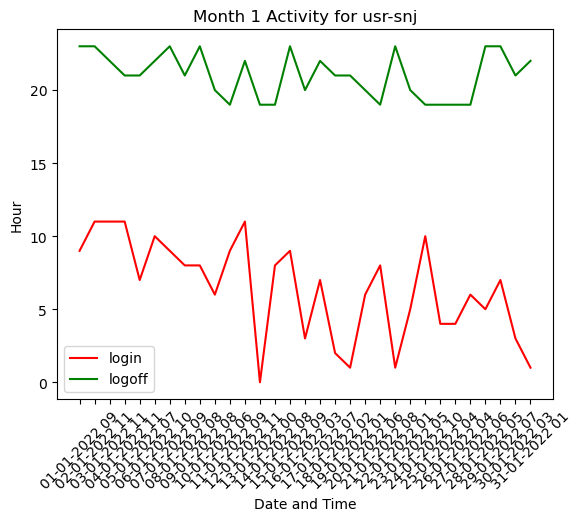

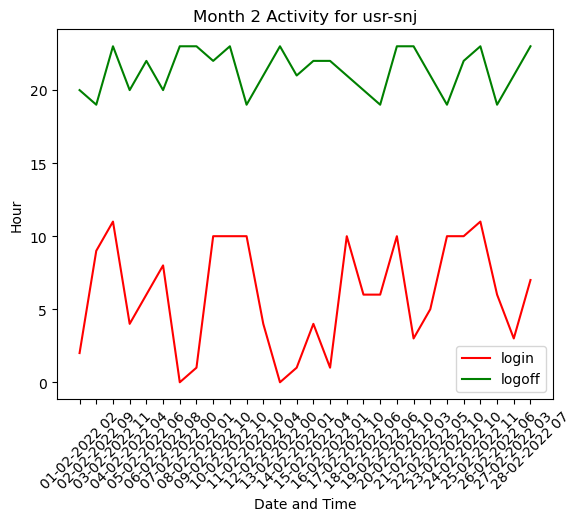

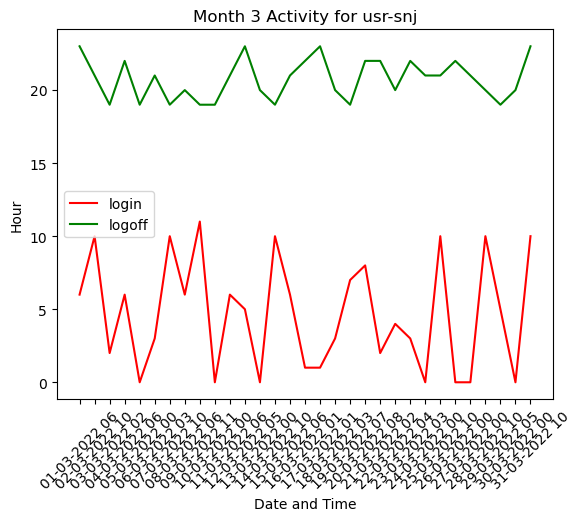

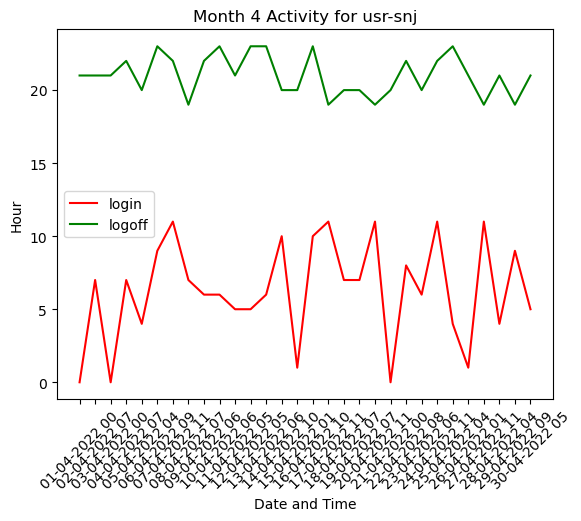

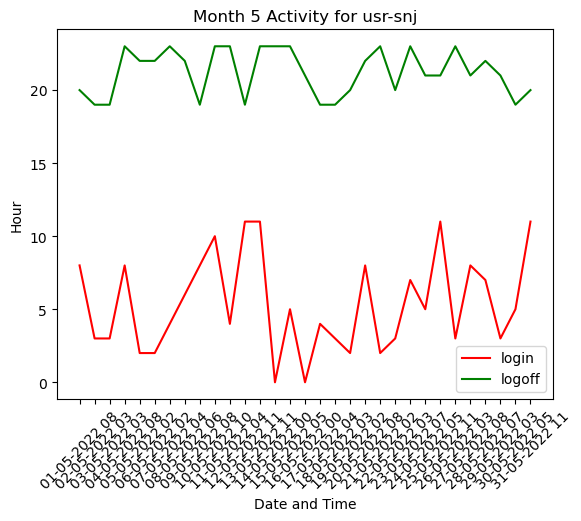

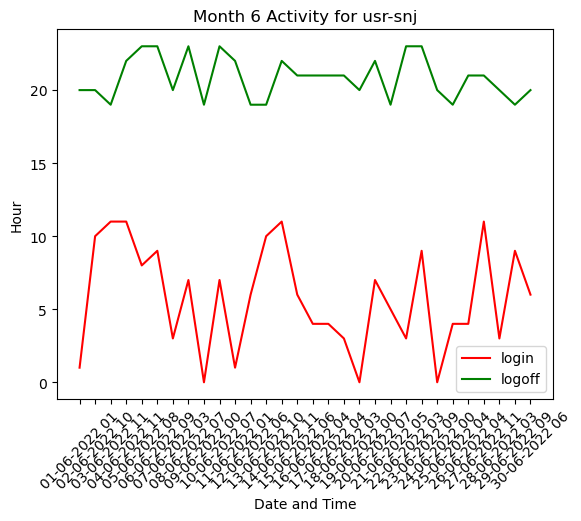

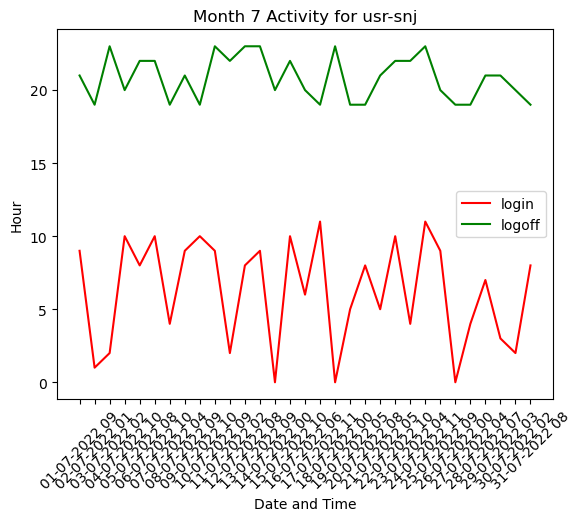

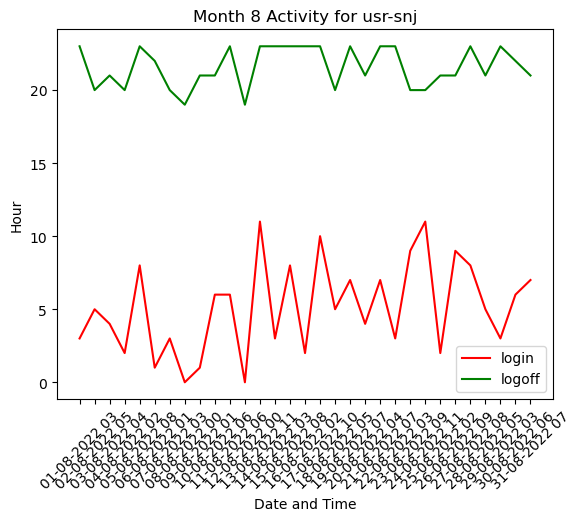

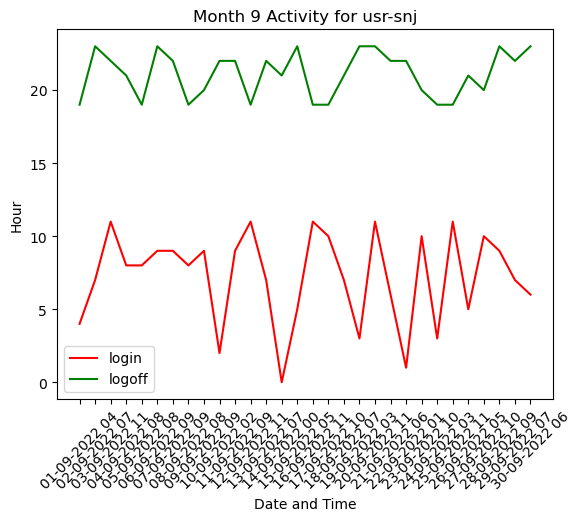

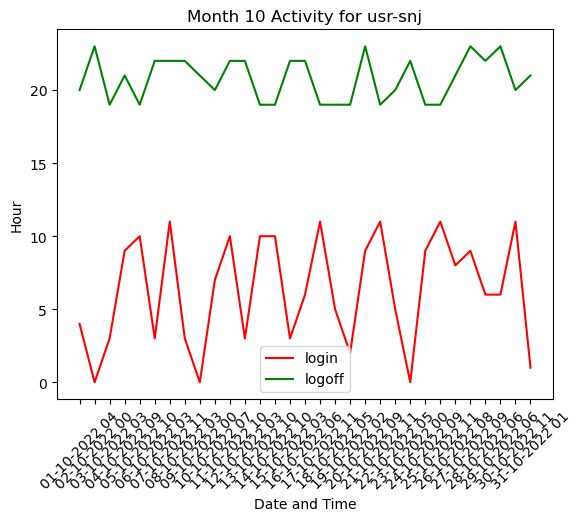

In [17]:
snj_df=login_data.copy()

snj_df['datetime'] = pd.to_datetime(snj_df['datetime'], format='%d-%m-%Y %H:%M:%S')
snj_df['month'] = snj_df['datetime'].dt.month
snj_df['hour'] = snj_df['datetime'].dt.hour
snj_df['datetime'] = snj_df['datetime'].dt.strftime('%d-%m-%Y %H')

# Extracting month from datetime column
#filtering per month and user 
for month in range(1, 11):
    # Filter the data for the specific month and user
    monthly_data = snj_df[(snj_df['month'] == month) & (snj_df['user'] == 'usr-snj')]
    
    # Separate login and logoff actions
    login = monthly_data[monthly_data['action'] == 'login']
    logoff = monthly_data[monthly_data['action'] == 'logoff']
    
    # Create line chart for the month
    plt.figure()  # Create a new figure for each month
    plt.plot(login['datetime'], login['hour'], color='r', label='login')
    plt.plot(login['datetime'], logoff['hour'], color='g', label='logoff')
    plt.title(f'Month {month} Activity for usr-snj')
    plt.xlabel('Date and Time')
    plt.ylabel('Hour')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

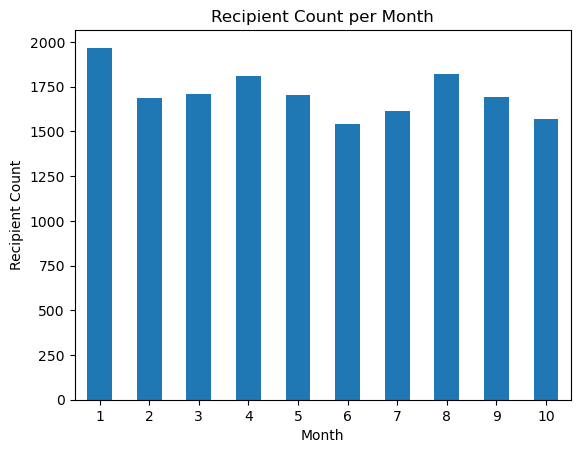

In [173]:
snj_email=email_data.copy()
snj_email['datetime'] = pd.to_datetime(snj_email['datetime'], format='%d-%m-%Y %H:%M:%S')
snj_email['month'] = snj_email['datetime'].dt.month
snj_email['day'] = snj_email['datetime'].dt.day
snj_email['hour'] = snj_email['datetime'].dt.hour
#filter results per user 

snj_email=snj_email[ (snj_email['sender']=='usr-snj@uwetech.com') ]
snj_email
#group the number of recipient per month 
recipient_counts = snj_email.groupby('month')['recipient'].count()
recipient_counts
recipient_counts.plot.bar(rot=0, title="Recipient Count per Month")
plt.xlabel("Month")
plt.ylabel("Recipient Count")
plt.show()

# Figure 8: Bar chart showing usr-snj's emails sent count from month 1 to 10 

#### Investigating the activity of the next attribute email did not show anything suspicious regarding the number of emails usr-snj sends per month which is usually around 1500/1800 a month 

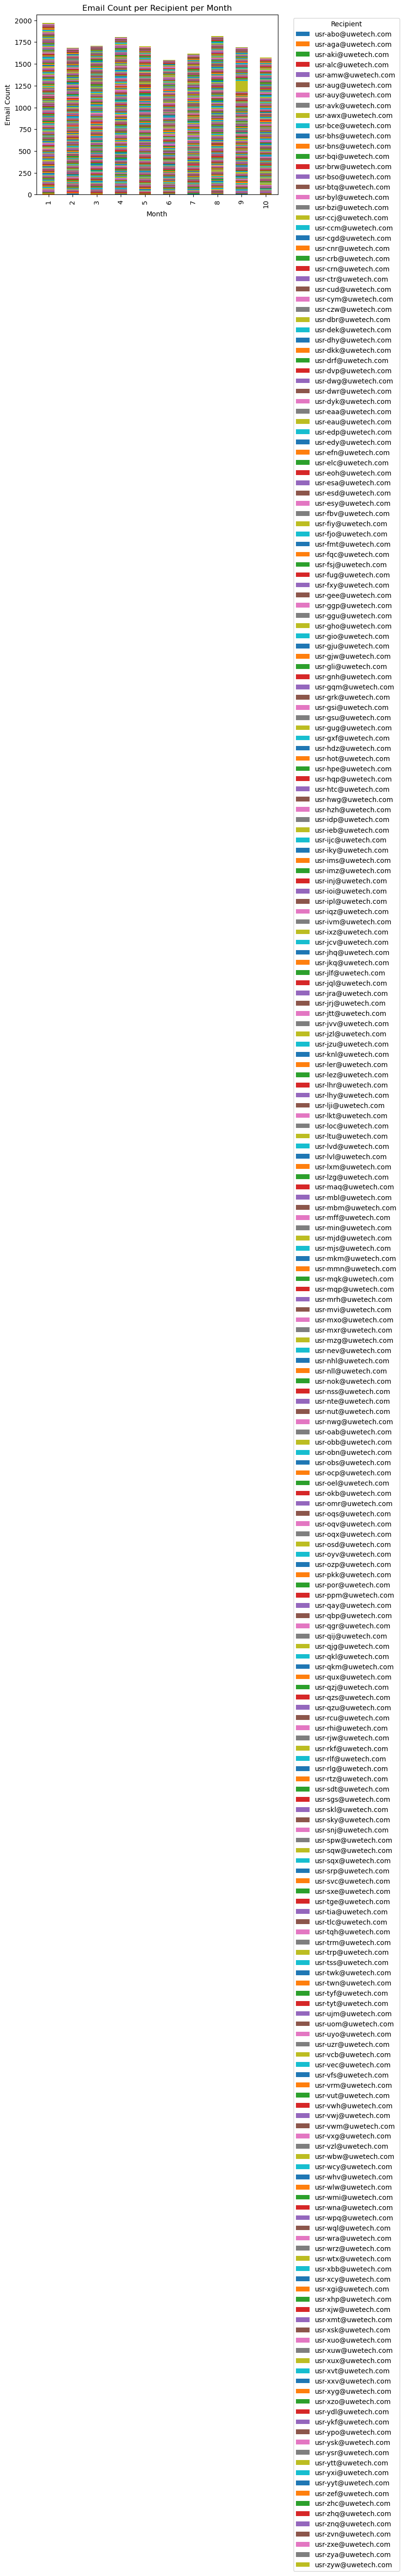

In [179]:
#checking emails sent or received by usr-snj 
snj_email=email_data
snj_email['datetime'] = pd.to_datetime(snj_email['datetime'], format='%d-%m-%Y %H:%M:%S')
snj_email['month'] = snj_email['datetime'].dt.month
snj_email['day'] = snj_email['datetime'].dt.day
snj_email['hour'] = snj_email['datetime'].dt.hour
#filter results per sender 

snj_email=snj_email[ (snj_email['sender']=='usr-snj@uwetech.com') ]
snj_email
# group the recipients by month 
email_counts = snj_email.groupby(['month', 'recipient']).size().unstack(fill_value=0)

# for each month its count of emails  stacked by recipient 
email_counts.plot(kind='bar', stacked=True, title="Email Count per Recipient per Month")
plt.xlabel("Month")
plt.ylabel("Email Count")
plt.legend(title='Recipient', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Figure 9: bar chart highlighting the number of emails sent by usr-snj to their recipients per month 

#### From Figure 9 can easily be deducted that usr-snj emailed one of their recipients during month 9 more than they ever did on other months as well as more times than any other recipient during these 10 months . The Figure 10 below confirms the results found on Figure 9 . As can be seen usr-trp has received over 120 emails from usr-snj during September which is equivalent to 6 times the amount received by other recipients .

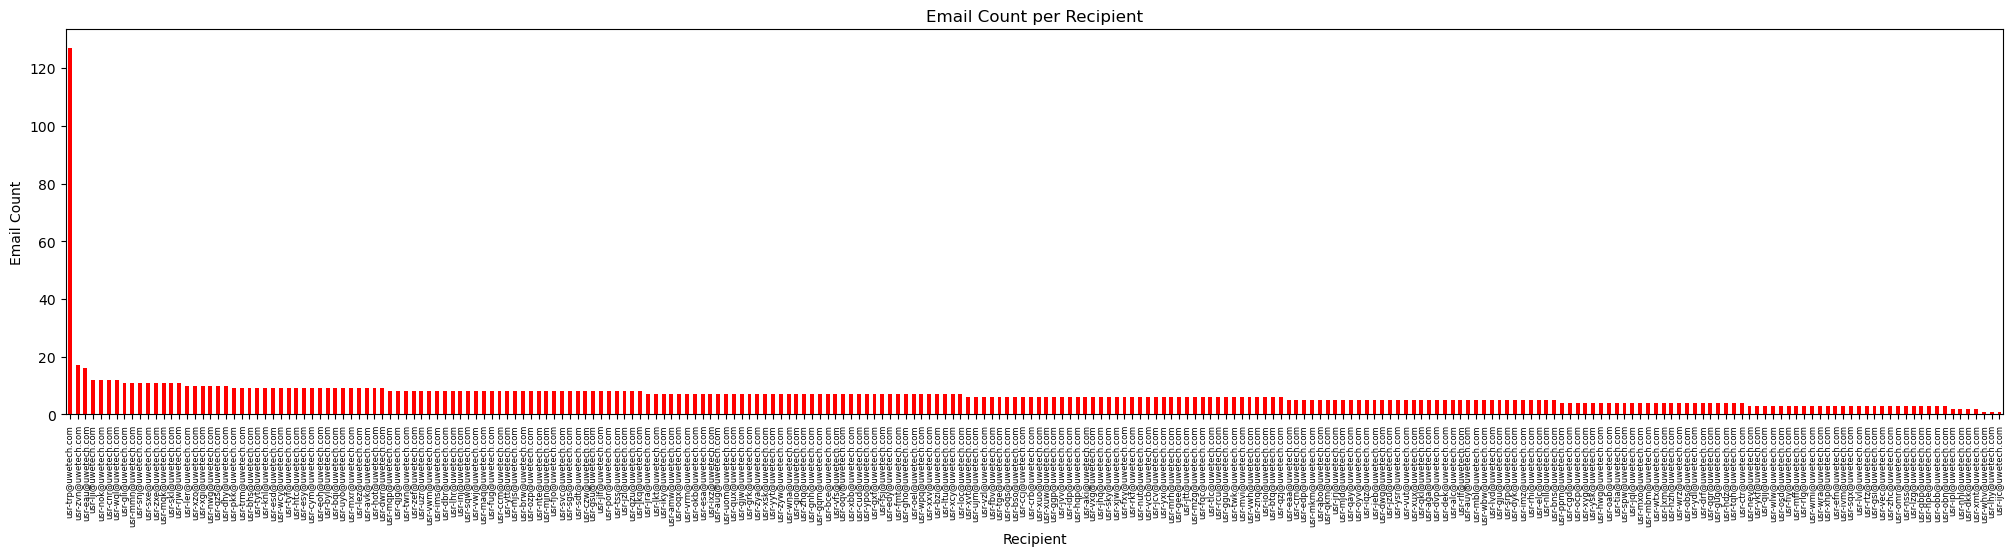

In [18]:
snj_email=email_data
snj_email['datetime'] = pd.to_datetime(snj_email['datetime'], format='%d-%m-%Y %H:%M:%S')
snj_email['month'] = snj_email['datetime'].dt.month
snj_email['day'] = snj_email['datetime'].dt.day
snj_email['hour'] = snj_email['datetime'].dt.hour

snj_email=snj_email[ (snj_email['sender']=='usr-snj@uwetech.com') & (snj_email['month']==9) ]

snj_email
count=snj_email['recipient'].value_counts()
#count
plt.figure(figsize=(25, 5)) 
count.plot(kind='bar', title="Email Count per Recipient",color='red')
plt.xlabel("Recipient")
plt.ylabel("Email Count")
plt.xticks(rotation=90, fontsize=6) 
plt.show()

# Figure 10: Bar chart showing the number of emails received by staff from usr-snj during the month of September  

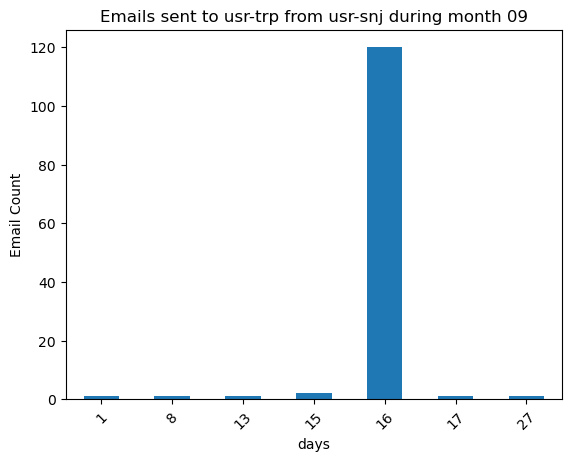

In [199]:
snj_email=email_data.copy()
snj_email['datetime'] = pd.to_datetime(snj_email['datetime'], format='%d-%m-%Y %H:%M:%S')
snj_email['month'] = snj_email['datetime'].dt.month
snj_email['day'] = snj_email['datetime'].dt.day
snj_email['hour'] = snj_email['datetime'].dt.hour

# filter emails to only those sent from usr-snj to usr-trp during Sep
snj_email=snj_email[ (snj_email['sender']=='usr-snj@uwetech.com') & (snj_email['recipient']=='usr-trp@uwetech.com')& (snj_email['month']==9) ]
emails_count = snj_email.groupby('day')['recipient'].count()
emails_count
emails_count.plot(kind='bar', title="Emails sent to usr-trp from usr-snj during month 09")
plt.xlabel("days")
plt.ylabel("Email Count")
plt.xticks(rotation=45) 
plt.show()



# Figure 11a: bar chart representing the number of emails sent to usr-trp from usr-snj during September 

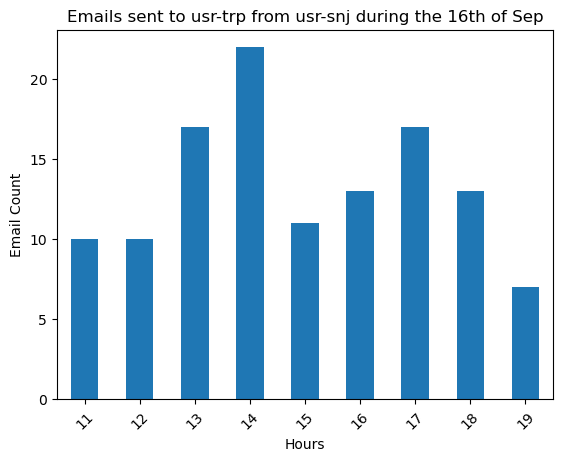

In [201]:
snj_email=email_data.copy()
snj_email['datetime'] = pd.to_datetime(snj_email['datetime'], format='%d-%m-%Y %H:%M:%S')
snj_email['month'] = snj_email['datetime'].dt.month
snj_email['day'] = snj_email['datetime'].dt.day
snj_email['hour'] = snj_email['datetime'].dt.hour

# filter emails to only those sent from usr-snj to usr-trp during the 16th of Sep
snj_email=snj_email[ (snj_email['sender']=='usr-snj@uwetech.com') & (snj_email['recipient']=='usr-trp@uwetech.com')& (snj_email['month']==9)& (snj_email['day']==16) ]
emails_count = snj_email.groupby('hour')['recipient'].count()
emails_count
emails_count.plot(kind='bar', title="Emails sent to usr-trp from usr-snj during the 16th of Sep")
plt.xlabel("Hours")
plt.ylabel("Email Count")
plt.xticks(rotation=45) 
plt.show()

# Figure 11b : bar chart representing the number of emails sent to usr-trp from usr-snj on the 16th of September per hour 

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


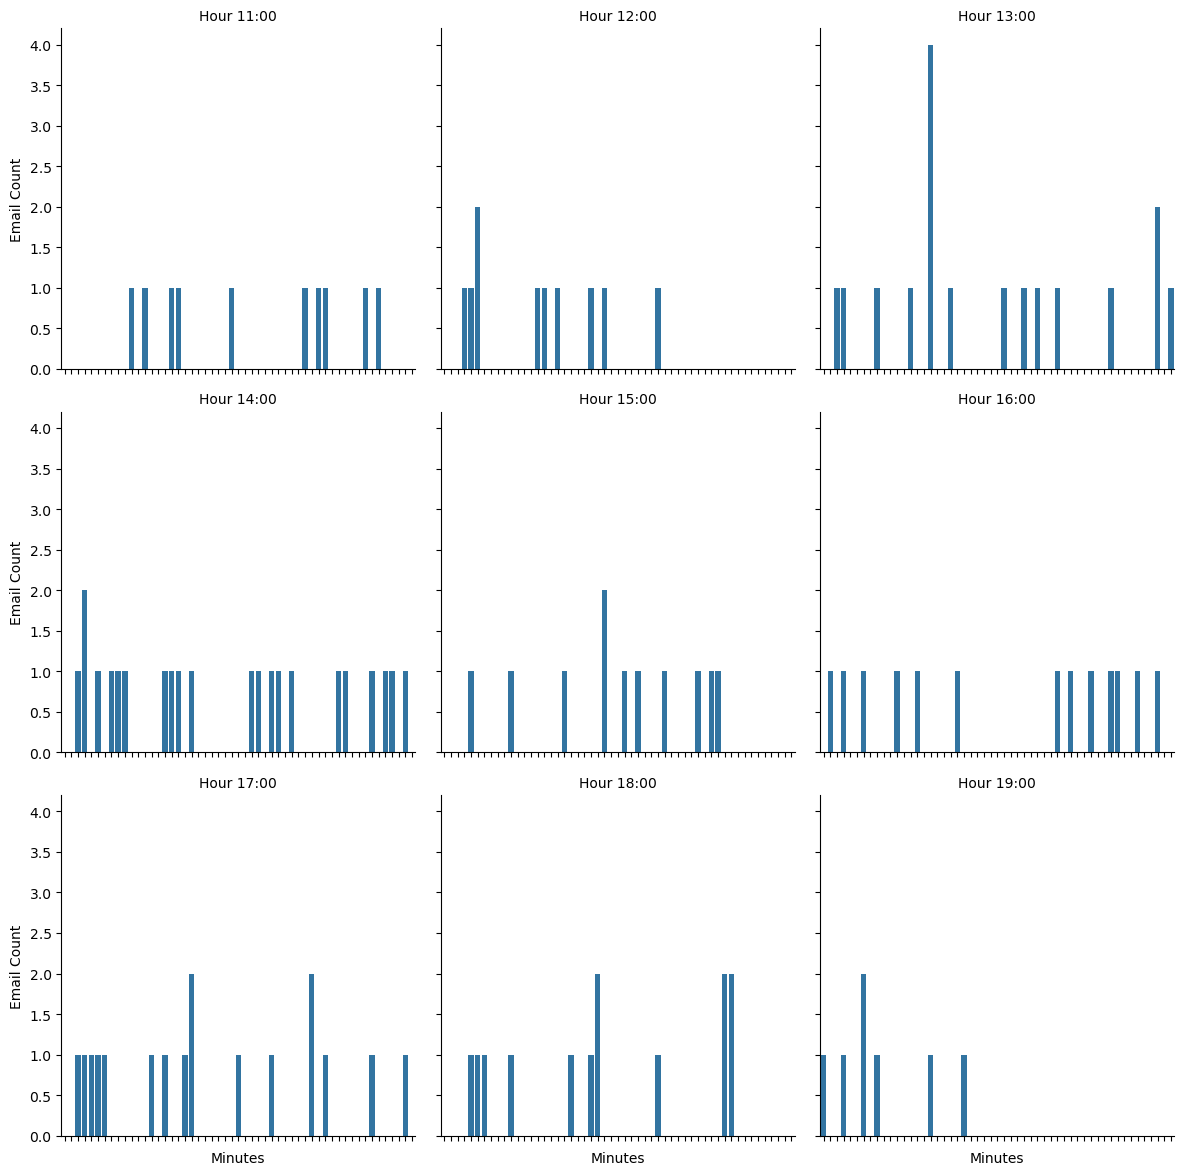

In [206]:
snj_email=email_data.copy()
snj_email['datetime'] = pd.to_datetime(snj_email['datetime'], format='%d-%m-%Y %H:%M:%S')
snj_email['month'] = snj_email['datetime'].dt.month
snj_email['day'] = snj_email['datetime'].dt.day
snj_email['hour'] = snj_email['datetime'].dt.hour
snj_email['min'] = snj_email['datetime'].dt.minute
# filter emails to only those sent from usr-snj to usr-trp during Sep on the 16th of Sep
snj_email = snj_email[(snj_email['sender'] == 'usr-snj@uwetech.com') & 
                      (snj_email['recipient'] == 'usr-trp@uwetech.com') & 
                      (snj_email['month'] == 9) & 
                      (snj_email['day'] == 16)]
# Counting the emails sent to usr_trp ach hour per minutes 
emails_count = snj_email.groupby(['hour', 'min'])['recipient'].count().reset_index(name='count')
import seaborn as sns
# Creating multiple bar charts for each hour using seaborn's facegrid 
g = sns.FacetGrid(emails_count, col="hour", col_wrap=3, height=4, aspect=1)
g.map(sns.barplot, "min", "count", order=sorted(emails_count['min'].unique()))
g.set_axis_labels("Minutes", "Email Count")
g.set_titles("Hour {col_name}:00")
g.set_xticklabels(rotation=45)
plt.show()



# Figure 11c : bar charts representing the number of emails sent to usr-trp from usr-snj on the 16th of September per minutes 

#### Figures 11(a,b,c) show the large number of emails usr-snj sent to usr-trp during the month of September specifically on the 16th where usr-snj can be seen sending multiple emails per hour from 11 to 19 with the highest number of emails being sent at 14h . 

[{'insertion_time': '22-09-2022 05:26', 'removal_time': '22-09-2022 05:52'}, {'insertion_time': '22-09-2022 08:54', 'removal_time': '22-09-2022 09:38'}, {'insertion_time': '25-09-2022 15:08', 'removal_time': '25-09-2022 15:48'}, {'insertion_time': '25-09-2022 18:23', 'removal_time': '25-09-2022 19:11'}, {'insertion_time': '29-09-2022 17:19', 'removal_time': '29-09-2022 17:47'}, {'insertion_time': '29-09-2022 20:21', 'removal_time': '29-09-2022 20:49'}]


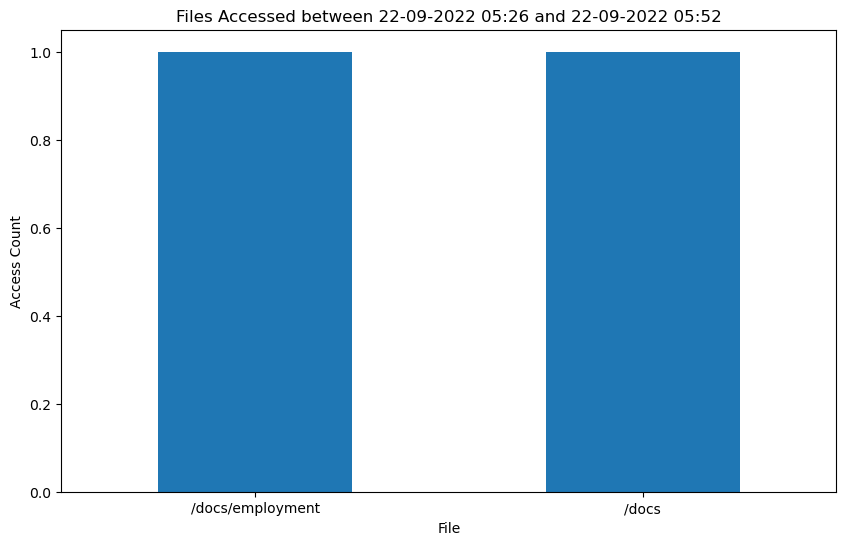

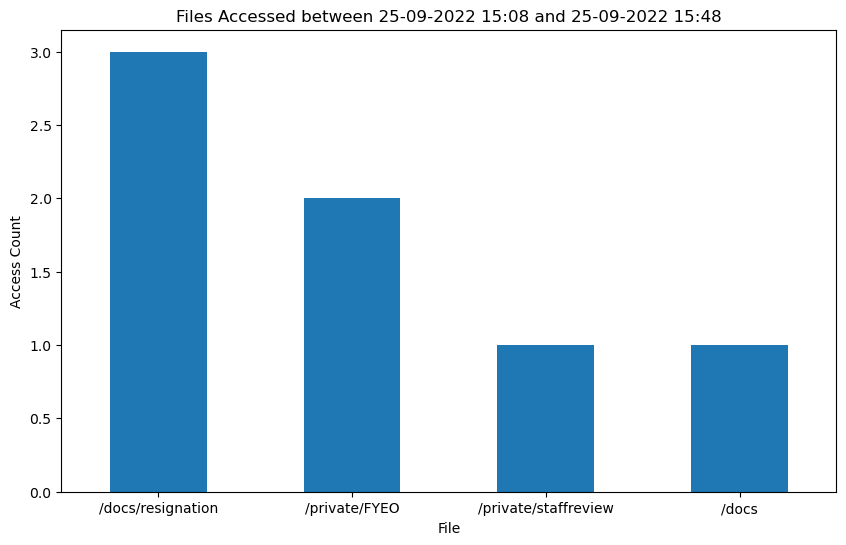

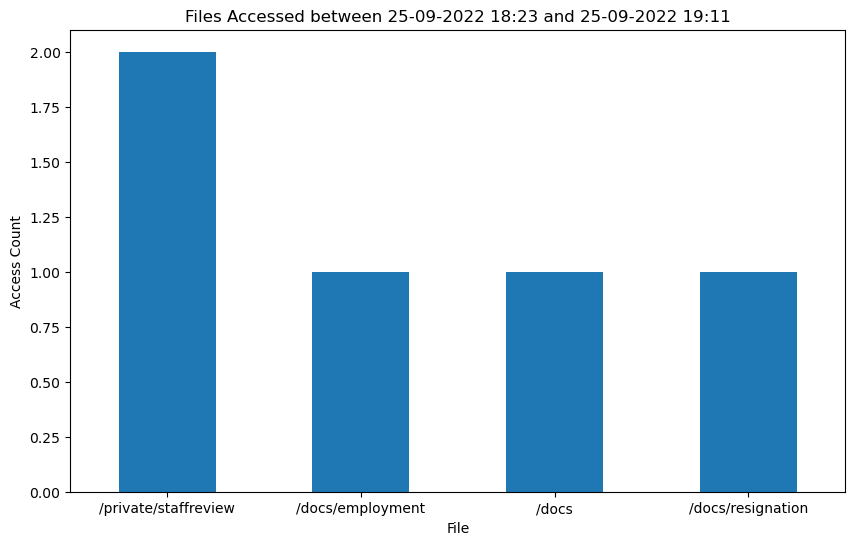

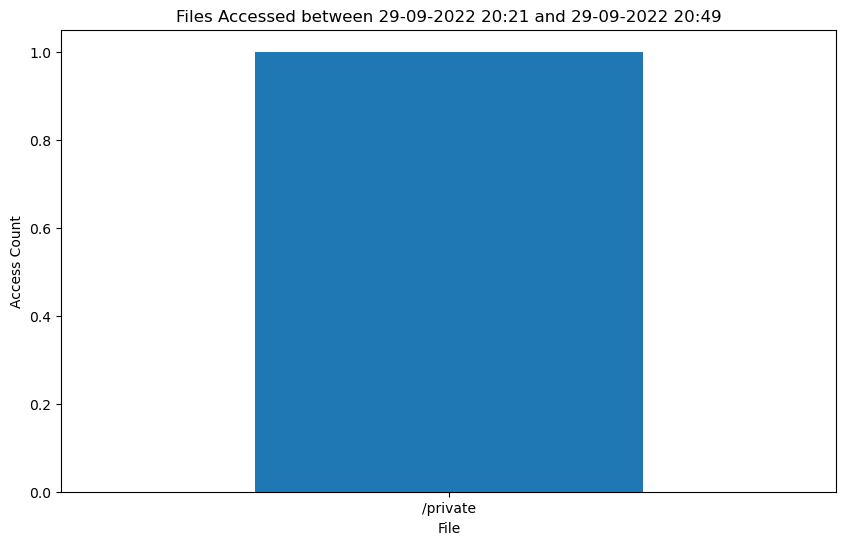

In [225]:
usb=usb_data.copy()
usb['datetime'] = pd.to_datetime(usb['datetime'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M')
# filtering usb activity to only user snj 
usbb = usb[usb['user'] == 'usr-snj']
# getting the unique timeframe where user snj has inserted or removed their usb 
unique_insertion_removal_times = usbb[usbb['action'].isin(['usb_insert', 'usb_remove'])]['datetime'].unique()

# Create the insertion_removal_times list to get all the insertion and removal times 
insertion_removal_times = []
for i in range(0, len(unique_insertion_removal_times), 2):
    insertion_removal_times.append({'insertion_time': unique_insertion_removal_times[i], 'removal_time': unique_insertion_removal_times[i+1]})
print(insertion_removal_times)

# filtering the file_data file by usr-snj and get each segment based on the insertion and removal times 
# representing the files accessed during each segment when the usb activity was detected 
files=file_data.copy()
files = files[files['user'] == 'usr-snj']
files['datetime'] = pd.to_datetime(files['datetime'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M')
for segment in insertion_removal_times:
    filtered_df = files[(files['datetime'] >= segment['insertion_time']) & (files['datetime'] <= segment['removal_time'])]['filename']
    if len(filtered_df)==0:
        pass
    else:
        file_counts = filtered_df.value_counts()
    
    
        plt.figure(figsize=(10, 6))
        file_counts.plot(kind='bar')
        plt.title(f'Files Accessed between {segment["insertion_time"]} and {segment["removal_time"]}')
        plt.xlabel('File')
        plt.ylabel('Access Count')
        plt.xticks(rotation=0) 
        plt.show()

# Figure 12: Bar charts representing the files accessed by usr-snj's during the usb activity timeframes 

#### As shown on figure 12 folders related to staff employment and resignation have been viewed during this timeframe, in addition to the private folder and more specifically the FYEO file. While the access to these files don't seem suspicious but the context in which they have been accessed on the other hand makes it .

### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 

Please make clear which dataset you have used for your investigation.

#### (10 marks)
#### Results of the investigation of dataset 3

- At the end of the investigation, usr-snj has been identified as the suspect. **7** suspicious events were found which all pointed at the usr-snj from the Directors department. 
- It all started on the **16th of September** proof showed that the suspect has been email bombing usr-trp from the legal team by sending them emails every 10 minutes from 11 to 19 **Figure11c**. 

- The second event was on the **22nd of September** a first usb activity was detected between 5:26 and 5:52 as well as between 8:54 and 9:38 , at that exact time the suspect can be seen accessing private staff folders from the file_data dataset **Figure12**. While accessing these files is not unusual for usr-snj or other staff members part of the Director this activity linked to the usb one direct us into thinking that the suspect is committing a crime. Furthermore, additional usb activity was detected on the **25th of September** between 15:08 and 15:48, in fact the amount of suspicious events found on the 25th confirming the suspicions had before. The user snj had been visiting both websites (lawyers4u and LinkedIn) multiple times that day 5 and 10 times consecutively**Figure5**. As explained previously, while these websites are considered as a normal activity for other departments, no other Director seems to visit these **Figure4**. Additionally the suspect only browsed these websites on the 25th. An additional usb activity has been detected on the **29th of September** between 20:21 and 20:49. 

- **Reflection**: From the findings and the discussion above, I’ve identified the suspect as being usr-snj based on the analysis of the data presented in the 6 different datasets. The suspect committed data theft on 3 different days (22, 25, and 29) of September. I came to this conclusion by comparing the timestamps between the USB activity and the files accessed **Figure12**. The suspect were aware they were committing a crime as  they were looking for both a lawyer and a new job on LinkedIn on the same day (25) right as they were committing the crime. As for the 127 emails were sent to usr-trp **Figure10** they were considered as an attempt at email bombing due to both their quantity and the frequency (approximately every 10 minutes ) with the goal of either creating a distraction to hide their data theft crimes or to cause chaos over the UWETech’s network

